In [8]:
import math
n = 4
x = [0,1,2,3,4]
e = math.exp(1)
a = [1,e,e**2,e**3,e**4]

In [9]:
def Spline(n,x,a):
  h = [0]*n
  for i in range(n):
    h[i] = x[i+1]-x[i]
  alpha = [0]*n
  for j in range(1,n):
    alpha[j] = ((a[j+1]-a[j])*(3/h[j])) - ((a[j]-a[j-1])*(3/h[j-1]))
  l = [1]*(n+1)
  u = [0]*n
  z = [0]*(n+1)
  for k in range(1,n):
    l[k] = (2*(x[k+1]-x[k-1])) - (h[k-1]*u[k-1])
    u[k] = h[k]/l[k]
    z[k] = (alpha[k]-(h[k-1]*z[k-1]))/l[k]
  b = [0]*n
  c = [0]*(n+1)
  d = [0]*n
  for m in range(n-1,-1,-1):
    c[m] = z[m] - (u[m]*c[m+1])
    b[m] = (a[m+1]-a[m])/h[m] - ((h[m]*(c[m+1]+(2*c[m])))/3)
    d[m] = (c[m+1]-c[m])/(3*h[m])
  return (a[:-1],b,c[:-1],d)

In [10]:
Spline(n,x,a)

([1, 2.718281828459045, 7.3890560989306495, 20.085536923187664],
 [1.1111266016600045,
  2.9325922820571266,
  6.325672566903438,
  23.86648273451499],
 [0.0, 1.821465680397122, 1.5716146044491879, 15.96919556316236],
 [0.6071552267990407,
  -0.08328369198264474,
  4.799193652904391,
  -5.323065187720787])

\begin{align}
  \text{S}(x) = \left\{
        \begin{array}{cl}
        1 + 1.11113x + 0.60716x^3 & x \in [0,1] \\
        2.71828 + 2.93259(x-1) + 1.82147(x-1)^2 - 0.08328(x-1)^3 & x \in [1,2] \\
        7.38906 + 6.32567(x-2) + 1.57161(x-2)^2 + 4.79919(x-2)^3 & x \in [2,3] \\
        20.08554 + 23.86648(x-3) + 15.9692(x-3)^2 - 5.32307(x-3)^3 & x \in [3,4]
        \end{array}
        \right.
\end{align} 

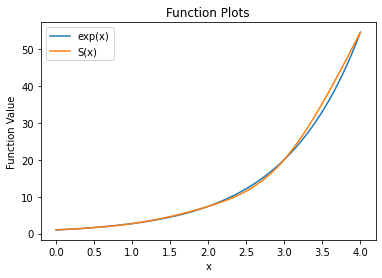

In [11]:
import numpy as np
x = np.linspace(0,4,100)
y1 = np.exp(x)
def S(x):
  if x>=0 and x<=1:
    f = 1 + 1.11113*x + 0.60716*(x**3)
  if x>1 and x<=2:
    f = 2.71828 + 2.93259*(x-1) + 1.82147*((x-1)**2) - 0.08328*((x-1)**3)
  if x>2 and x<=3:
    f = 7.38906 + 6.32567*(x-2) + 1.57161*((x-2)**2) + 4.79919*((x-2)**3)
  if x>3 and x<=4:
    f = 20.08554 + 23.86648*(x-3) + 15.9692*((x-3)**2) - 5.32307*((x-3)**3)
  return f
y2 = np.array([S(i) for i in x.tolist()])
import matplotlib.pyplot as plt
plt.plot(x,y1)
plt.plot(x,y2)
plt.title('Function Plots')
plt.xlabel('x')
plt.ylabel('Function Value')
plt.legend(['exp(x)','S(x)'])